# <center>**Spam Classifier**</center>

## <center>**Read File**</center>

In [4]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [5]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## <center>**Text Cleaning and Preprocessing**</center>

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
ps = PorterStemmer()

In [10]:
corpus = []
for i in range(len(messages)):
  review = re.sub('^[a-zA-Z]', ' ', messages['message'][i])
  review = review.split()
  review = [word for word in review if word not in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(corpus).toarray()

In [19]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

## <center>**Model Training and Testing**</center>

In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [24]:
import seaborn as sns

Accuracy Score:  0.9847533632286996


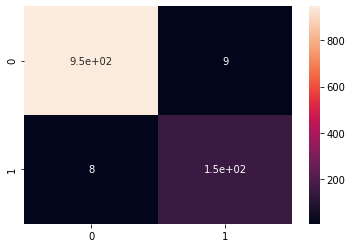

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score: ",ac)
sns.heatmap(cm, annot = True)